<a href="https://colab.research.google.com/github/drueda869/Estad-stica/blob/main/Estad%C3%ADstica_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("ResultadosSabanetaSaber11.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
Primeras filas del dataset
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimie


Valores faltantes por columna:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


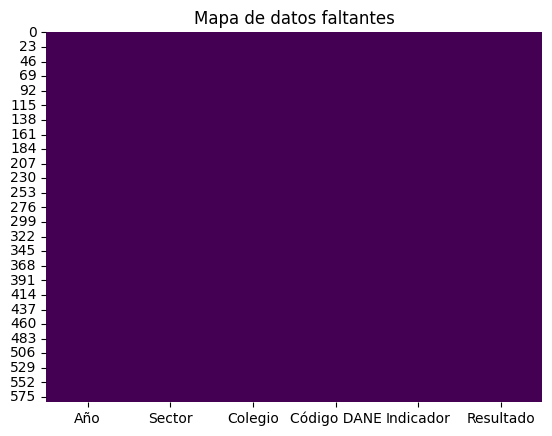

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()


Número de filas después de eliminar datos faltantes: 583

Datos faltantes por columna después de la limpieza:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


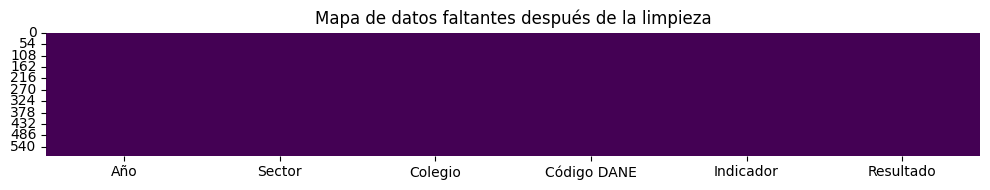

In [ ]:
# 3. Eliminar filas con datos faltantes y verificar limpieza

# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

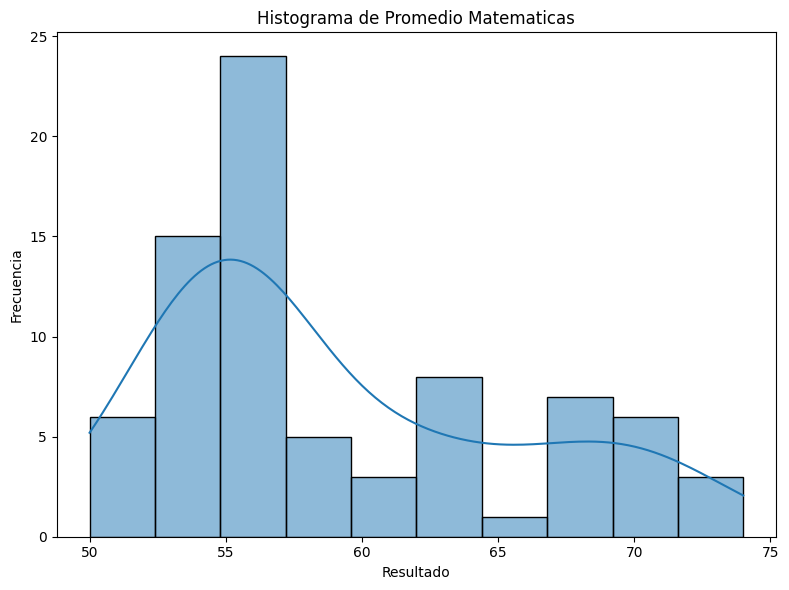

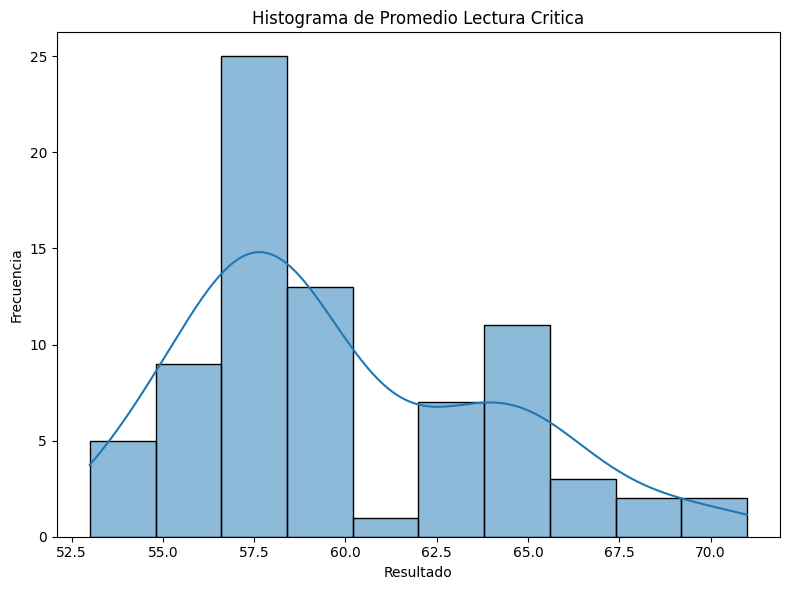

No data available for Promedio Ingles
No data available for Promedio Ciencias Naturales
No data available for Promedio Sociales y Ciudadanas


In [ ]:
# List of subject indicators
subject_indicators = [
    'Promedio Matematicas',
    'Promedio Lectura Critica',
    'Promedio Ingles',
    'Promedio Ciencias Naturales',
    'Promedio Sociales y Ciudadanas'
]

# Generate histograms for each subject indicator
for indicator in subject_indicators:
    df_subject = df_filtrado[df_filtrado['Indicador'] == indicator]

    if not df_subject.empty:
        plt.figure(figsize=(8, 6))
        sns.histplot(df_subject['Resultado'], bins=10, edgecolor='black', kde=True)
        plt.xlabel('Resultado')
        plt.ylabel('Frecuencia')
        plt.title(f'Histograma de {indicator}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for {indicator}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de caja para Peso
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Peso'])
plt.title('Diagrama de Caja - Peso')
plt.tight_layout()
plt.show()

# Diagrama de caja para Talla
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Talla'])
plt.title('Diagrama de Caja - Talla')
plt.tight_layout()
plt.show()

# Diagrama de caja para Tiempo de Gestación
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Tiempo_Gestación'])
plt.title('Diagrama de Caja - Tiempo de Gestación')
plt.tight_layout()
plt.show()


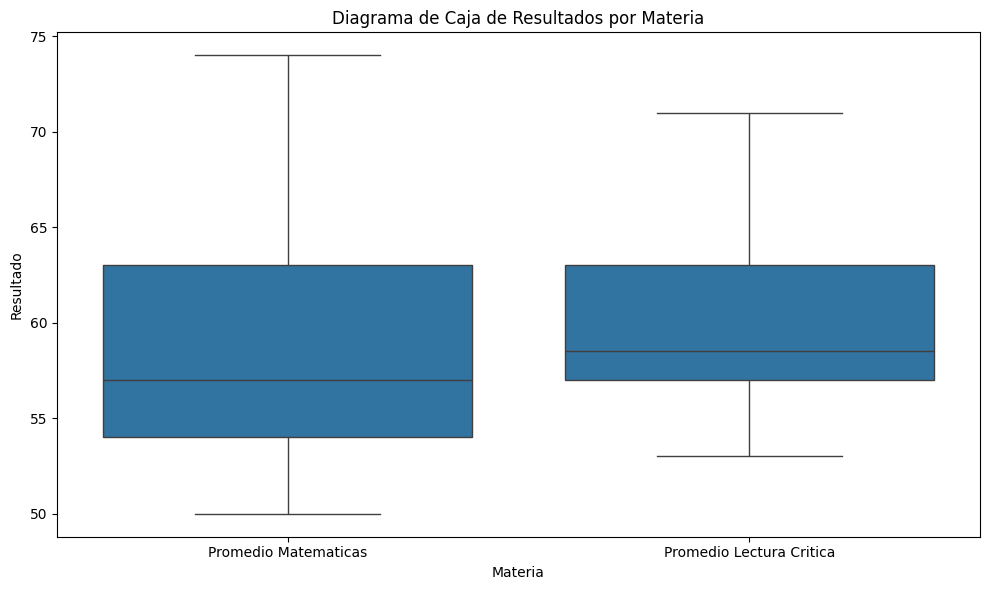

In [ ]:
# Filter data for the relevant subject indicators
subject_indicators = ['Promedio Matematicas', 'Promedio Lectura Critica']
df_subjects = df_filtrado[df_filtrado['Indicador'].isin(subject_indicators)].copy()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Indicador', y='Resultado', data=df_subjects)
plt.xlabel('Materia')
plt.ylabel('Resultado')
plt.title('Diagrama de Caja de Resultados por Materia')
plt.tight_layout()
plt.show()

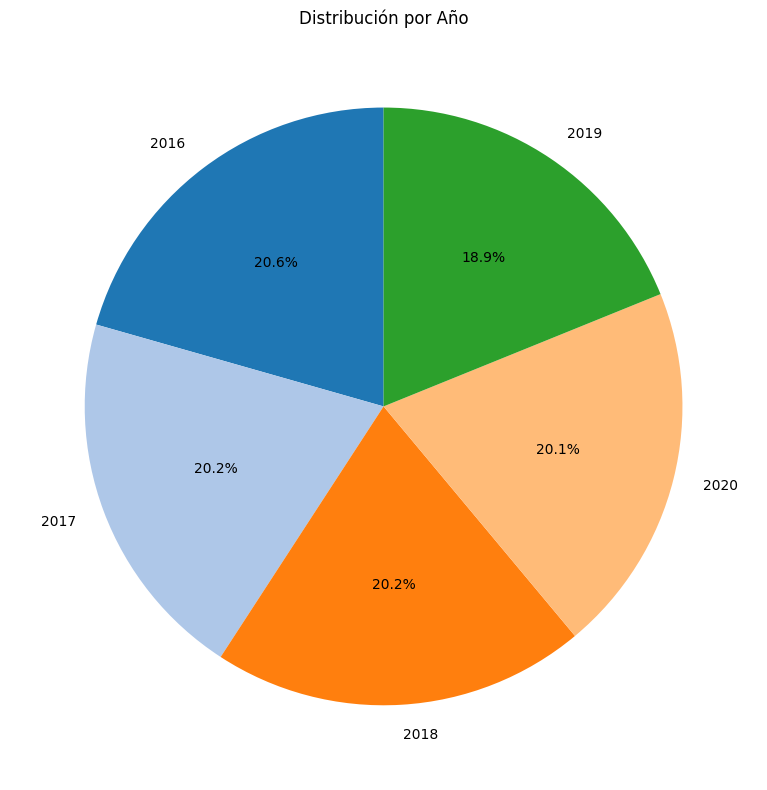

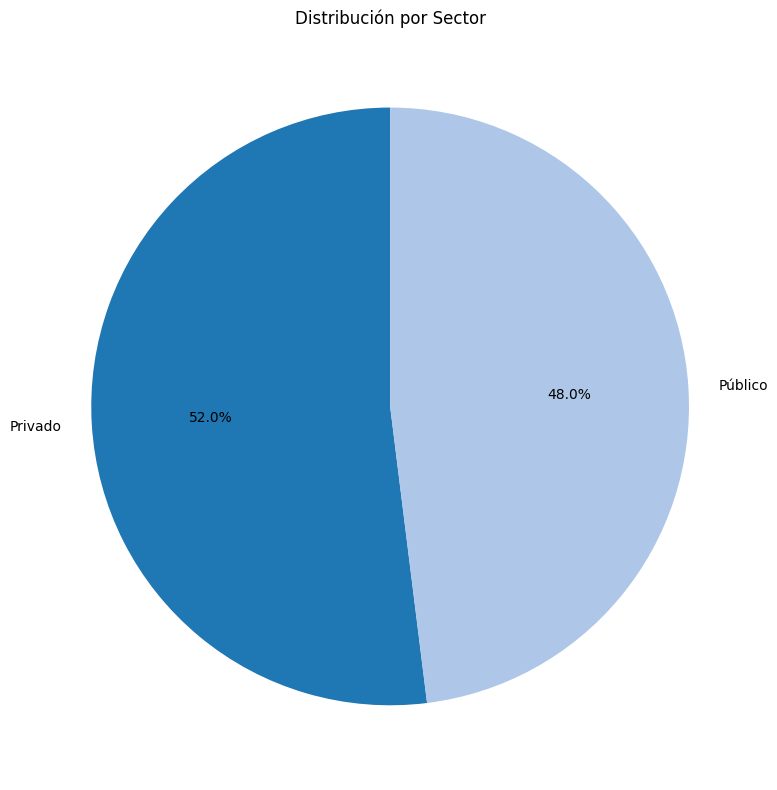

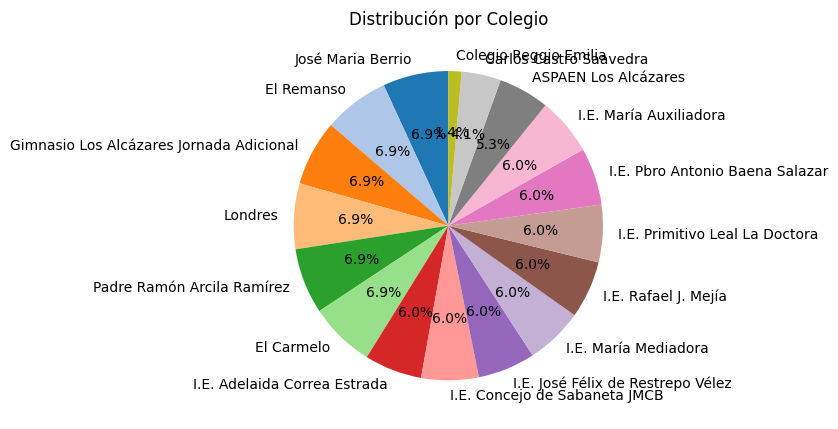

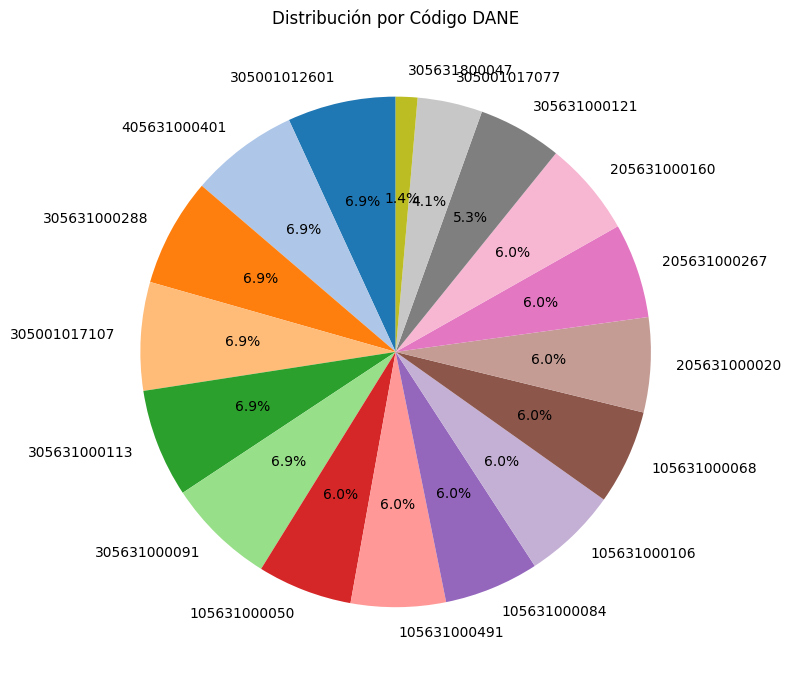

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos
# Exclude 'Indicador' from the list of categorical variables for pie charts
categorical_vars = [
    ('Año', 'Distribución por Año'), # Added Año as it is also categorical in this context
    ('Sector', 'Distribución por Sector'),
    ('Colegio', 'Distribución por Colegio'),
    ('Código DANE', 'Distribución por Código DANE') # Added Código DANE as it is also categorical in this context
]

for var, title in categorical_vars:
    plt.figure(figsize=(8, 8)) # Increased figure size for better readability of Colegio and Indicador charts
    df_filtrado[var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors # Using a colormap with more colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()

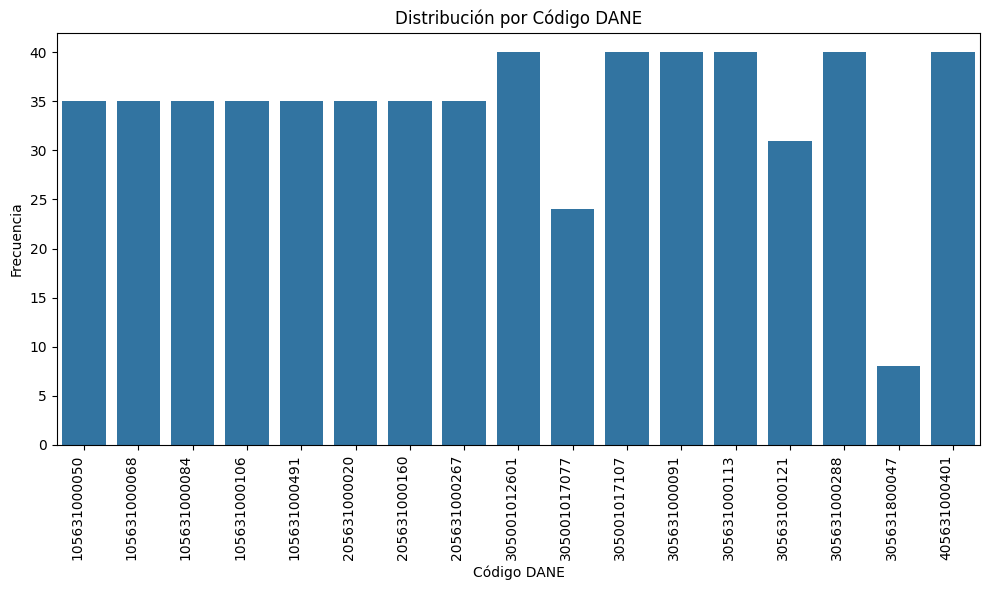

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='Código DANE')
plt.title('Distribución por Código DANE')
plt.xlabel('Código DANE')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()

In [ ]:
# Calcular Q1, Q3 e IQR para la columna 'Resultado'
Q1 = df_filtrado['Resultado'].quantile(0.25)
Q3 = df_filtrado['Resultado'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en la columna 'Resultado'
df_sinatipicos = df_filtrado[
    (df_filtrado['Resultado'] >= limite_inferior) & (df_filtrado['Resultado'] <= limite_superior)
]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")

Número de datos restantes después de eliminar outliers: 583


In [ ]:

# Calcular Q1, Q3 e IQR para la columna 'Resultado'
Q1 = df_filtrado['Resultado'].quantile(0.25)
Q3 = df_filtrado['Resultado'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en la columna 'Resultado'
df_sinatipicos = df_filtrado[
    (df_filtrado['Resultado'] >= limite_inferior) & (df_filtrado['Resultado'] <= limite_superior)
]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")

Número de datos restantes después de eliminar outliers: 583


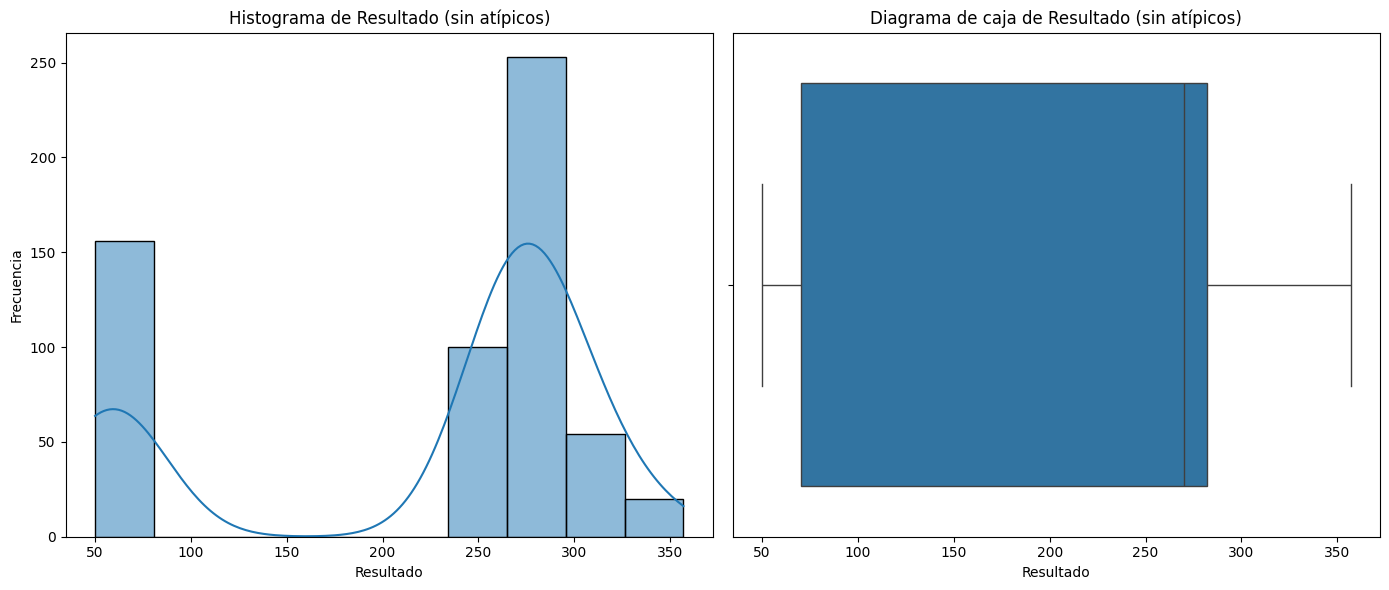

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjusted subplot layout for a single variable

# Histograma para Resultado
sns.histplot(df_sinatipicos['Resultado'], bins=10, edgecolor='black', kde=True, ax=axes[0])
axes[0].set_xlabel('Resultado')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Resultado (sin atípicos)')

# Boxplot para Resultado
sns.boxplot(x=df_sinatipicos['Resultado'], ax=axes[1])
axes[1].set_xlabel('Resultado')
axes[1].set_title('Diagrama de caja de Resultado (sin atípicos)')

plt.tight_layout()
plt.show()

Resultados de los tests de normalidad (valores p):

Variable: Resultado
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 80.5745, Crítico (5%): 0.7820
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)



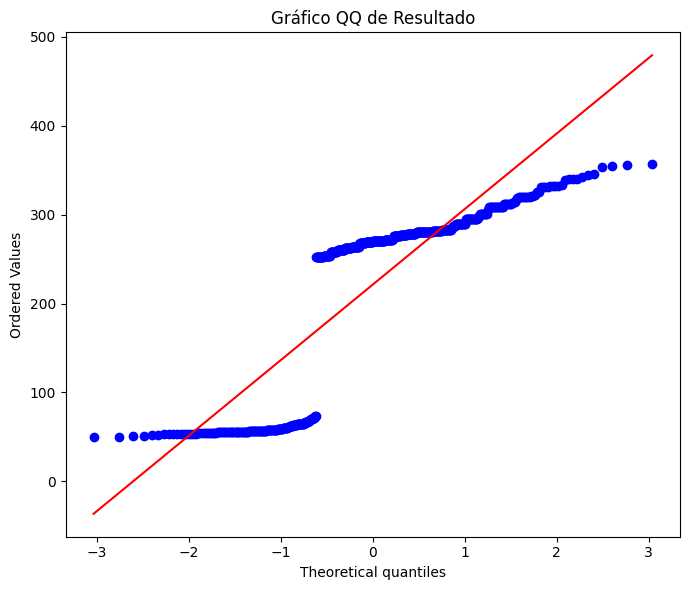

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar
columnas_a_evaluar = ['Resultado']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable
for col in columnas_a_evaluar:
    if col in df_filtrado.columns:
        datos = df_filtrado[col].dropna()
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(datos)
        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # 5%
        ad_normal = stat_ad < crit_ad
        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)
        # Guardar resultados
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 3
        }# Mostrar resultados en tabla
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# Gráficos QQ para cada variable
fig, axes = plt.subplots(1, 1, figsize=(7, 6)) # Adjusted subplot layout for a single variable
for i, col in enumerate(columnas_a_evaluar):
    if col in df_filtrado.columns:
        probplot(df_filtrado[col].dropna(), dist="norm", plot=axes)
        axes.set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()


In [ ]:
#!/usr/bin/env python3
"""
Análisis Estadístico de Datos de Saber 11
Análisis exploratorio completo con medidas de tendencia central y dispersión
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 10})

class AnalizadorSaber11:
    def __init__(self, archivo_csv):
        self.archivo = archivo_csv
        self.df_original = None
        self.df_filtrado = None
        self.df_sinatipicos = None
        self.variables_numericas = ['Resultado']
        self.variables_categoricas = ['Año', 'Sector', 'Colegio', 'Código DANE', 'Indicador']

    def cargar_datos(self):
        print("="*60)
        print("CARGANDO Y EXPLORANDO DATOS")
        print("="*60)
        try:
            self.df_original = pd.read_csv(self.archivo)
            print(f"✓ Archivo cargado exitosamente: {self.archivo}")
            print(f"✓ Dimensiones del dataset: {self.df_original.shape}")
            print("\n--- INFORMACIÓN DEL DATASET ---")
            self.df_original.info()
            print("\n--- PRIMERAS 5 FILAS ---")
            print(self.df_original.head())
            print("\n--- RESUMEN ESTADÍSTICO ---")
            print(self.df_original.describe(include='all'))
        except FileNotFoundError:
            print(f"❌ Error: No se encontró el archivo {self.archivo}")
            return False
        except Exception as e:
            print(f"❌ Error al cargar el archivo: {e}")
            return False
        return True

    def limpiar_datos(self):
        print("\n" + "="*60)
        print("LIMPIEZA DE DATOS")
        print("="*60)
        faltantes = self.df_original.isnull().sum()
        faltantes = faltantes[faltantes > 0]
        if not faltantes.empty:
            print("--- VALORES FALTANTES POR COLUMNA ---")
            print(faltantes)
            plt.figure(figsize=(12, 6))
            sns.heatmap(self.df_original.isnull(), cbar=True, cmap="viridis", yticklabels=False)
            plt.title("Mapa de Datos Faltantes - Dataset Original")
            plt.tight_layout()
            plt.show()
        else:
            print("No se encontraron valores faltantes.")
        self.df_filtrado = self.df_original.dropna()
        filas_eliminadas = len(self.df_original) - len(self.df_filtrado)
        print(f"\n✓ Filas eliminadas: {filas_eliminadas}")
        print(f"✓ Datos restantes: {len(self.df_filtrado)}")
        print(f"✓ Porcentaje de datos conservados: {(len(self.df_filtrado)/len(self.df_original))*100:.1f}%")
        plt.figure(figsize=(12, 6))
        sns.heatmap(self.df_filtrado.isnull(), cbar=True, cmap="viridis", yticklabels=False)
        plt.title("Mapa de Datos Faltantes - Después de Limpieza")
        plt.tight_layout()
        plt.show()

    def eliminar_outliers(self):
        print("\n" + "="*60)
        print("ELIMINACIÓN DE VALORES ATÍPICOS")
        print("="*60)
        df = self.df_filtrado.copy()
        outliers_eliminados = {}
        for var in self.variables_numericas:
            if var in df.columns:
                Q1 = df[var].quantile(0.25)
                Q3 = df[var].quantile(0.75)
                IQR = Q3 - Q1
                limite_inferior = Q1 - 1.5 * IQR
                limite_superior = Q3 + 1.5 * IQR
                mask = df[var].between(limite_inferior, limite_superior)
                outliers_eliminados[var] = (~mask).sum()
                df = df[mask]
                print(f"{var}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
                print(f"  Límites: [{limite_inferior:.2f}, {limite_superior:.2f}]")
                print(f"  Outliers eliminados: {outliers_eliminados[var]}")
        self.df_sinatipicos = df
        total_eliminados = len(self.df_filtrado) - len(self.df_sinatipicos)
        print(f"\n✓ Total de registros eliminados por outliers: {total_eliminados}")
        print(f"✓ Datos finales: {len(self.df_sinatipicos)}")
        print(f"✓ Porcentaje conservado: {(len(self.df_sinatipicos)/len(self.df_original))*100:.1f}%")

    def analizar_normalidad(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE NORMALIDAD")
        print("="*60)
        alpha = 0.05
        datasets = [("DATASET FILTRADO", self.df_filtrado), ("DATASET SIN OUTLIERS", self.df_sinatipicos)]
        for nombre, dataset in datasets:
            print(f"\n{nombre}:")
            print("-"*40)
            for var in self.variables_numericas:
                if var in dataset.columns:
                    stat, p = stats.shapiro(dataset[var])
                    curtosis = stats.kurtosis(dataset[var])
                    asimetria = stats.skew(dataset[var])
                    resultado = "✓ Distribución NORMAL (no se rechaza H0)" if p > alpha else "✗ Distribución NO NORMAL (se rechaza H0)"
                    print(f"{var}: Shapiro-Wilk={stat:.4f}, p-valor={p:.6f}, Curtosis={curtosis:.3f}, Asimetría={asimetria:.3f}")
                    print(f"  Resultado: {resultado}\n")

    def crear_histogramas(self):
        print("\n" + "="*60)
        print("GENERANDO HISTOGRAMAS COMPARATIVOS")
        print("="*60)
        fig, axes = plt.subplots(2, len(self.variables_numericas), figsize=(6*len(self.variables_numericas), 12))
        fig.suptitle('Histogramas Comparativos: Original vs Sin Outliers', fontsize=16)
        for i, var in enumerate(self.variables_numericas):
            if var in self.df_filtrado.columns:
                axes[0, i].hist(self.df_filtrado[var], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
                axes[0, i].set_title(f'{var} (Filtrado)')
                axes[0, i].set_xlabel(var)
                axes[0, i].set_ylabel('Frecuencia')
                axes[0, i].grid(True, alpha=0.3)
                axes[1, i].hist(self.df_sinatipicos[var], bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
                axes[1, i].set_title(f'{var} (Sin Outliers)')
                axes[1, i].set_xlabel(var)
                axes[1, i].set_ylabel('Frecuencia')
                axes[1, i].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def crear_boxplots(self):
        print("\n" + "="*60)
        print("GENERANDO DIAGRAMAS DE CAJA")
        print("="*60)
        fig, axes = plt.subplots(1, len(self.variables_numericas), figsize=(6*len(self.variables_numericas), 6))
        fig.suptitle('Diagramas de Caja: Comparación de Datasets', fontsize=16)
        for i, var in enumerate(self.variables_numericas):
            if var in self.df_filtrado.columns:
                data_to_plot = [self.df_filtrado[var].dropna(), self.df_sinatipicos[var].dropna()]
                box_plot = axes[i].boxplot(data_to_plot, labels=['Filtrado', 'Sin Outliers'], patch_artist=True)
                colors = ['lightblue', 'lightcoral']
                for patch, color in zip(box_plot['boxes'], colors):
                    patch.set_facecolor(color)
                axes[i].set_title(f'Boxplot - {var}')
                axes[i].set_ylabel(var)
                axes[i].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def analizar_categoricas(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
        print("="*60)
        vars_disponibles = [var for var in self.variables_categoricas if var in self.df_sinatipicos.columns]
        if not vars_disponibles:
            print("⚠️  No se encontraron las variables categóricas esperadas")
            print(f"Variables disponibles: {list(self.df_sinatipicos.columns)}")
            return
        n_vars = len(vars_disponibles)
        fig, axes = plt.subplots(2, n_vars, figsize=(6*n_vars, 10))
        if n_vars == 1:
             axes = axes.reshape(2, 1) # Reshape axes if there's only one categorical variable
        for i, var in enumerate(vars_disponibles):
            datos_var = self.df_sinatipicos[var].value_counts()
            axes[0, i].pie(datos_var.values, labels=datos_var.index, autopct='%1.1f%%', startangle=90)
            axes[0, i].set_title(f'Distribución - {var}')
            datos_var.plot(kind='bar', ax=axes[1, i], color='steelblue')
            axes[1, i].set_title(f'Frecuencias - {var}')
            axes[1, i].set_xlabel(var)
            axes[1, i].set_ylabel('Frecuencia')
            axes[1, i].tick_params(axis='x', rotation=45)
            print(f"\n{var}:")
            for categoria, freq in datos_var.items():
                pct = (freq / len(self.df_sinatipicos)) * 100
                print(f"  {categoria}: {freq} ({pct:.1f}%)")
        plt.tight_layout()
        plt.show()

    def analizar_variables_adicionales(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE VARIABLES ADICIONALES")
        print("="*60)
        # No additional variables to analyze based on the current dataset
        print("No hay variables adicionales para analizar en este dataset.")


    def calcular_estadisticas(self):
        print("\n" + "="*60)
        print("MEDIDAS ESTADÍSTICAS DESCRIPTIVAS")
        print("="*60)
        for var in self.variables_numericas:
            if var in self.df_sinatipicos.columns:
                datos = self.df_sinatipicos[var]
                print(f"\n{var.upper()}:\n{'-'*30}")
                print(f"{'Medida':<20} {'Valor':<10}")
                print(f"{'-'*30}")
                print(f"{'Media':<20} {datos.mean():<10.2f}")
                print(f"{'Mediana':<20} {datos.median():<10.2f}")
                # Check if mode is not empty before accessing iloc[0]
                mode_val = datos.mode()
                if not mode_val.empty:
                    print(f"{'Moda':<20} {mode_val.iloc[0]:<10.2f}")
                else:
                    print(f"{'Moda':<20} {'N/A':<10}")
                print(f"{'Desv. Estándar':<20} {datos.std():<10.2f}")
                print(f"{'Varianza':<20} {datos.var():<10.2f}")
                # Avoid division by zero for coefficient of variation
                if datos.mean() != 0:
                    print(f"{'Coef. Variación':<20} {(datos.std()/datos.mean())*100:<10.2f}%")
                else:
                    print(f"{'Coef. Variación':<20} {'N/A':<10}")
                print(f"{'Rango':<20} {datos.max() - datos.min():<10.2f}")
                print(f"{'Mínimo':<20} {datos.min():<10.2f}")
                print(f"{'Máximo':<20} {datos.max():<10.2f}")
                print(f"{'Q1 (25%)':<20} {datos.quantile(0.25):<10.2f}")
                print(f"{'Q3 (75%)':<20} {datos.quantile(0.75):<10.2f}")
                print(f"{'IQR':<20} {datos.quantile(0.75) - datos.quantile(0.25):<10.2f}")
                print(f"{'Asimetría':<20} {stats.skew(datos):<10.3f}")
                print(f"{'Curtosis':<20} {stats.kurtosis(datos):<10.3f}")

    def generar_reporte_final(self):
        print("\n" + "="*60)
        print("REPORTE FINAL DEL ANÁLISIS")
        print("="*60)
        print(f"📊 RESUMEN DE DATOS:")
        print(f"   • Registros originales: {len(self.df_original):,}")
        print(f"   • Registros después de limpieza: {len(self.df_filtrado):,}")
        print(f"   • Registros finales (sin outliers): {len(self.df_sinatipicos):,}")
        print(f"   • Porcentaje de datos conservados: {(len(self.df_sinatipicos)/len(self.df_original))*100:.1f}%")
        print(f"\n🔍 VARIABLES ANALIZADAS:")
        print(f"   • Variables numéricas: {', '.join(self.variables_numericas)}")
        print(f"   • Variables categóricas: {', '.join(self.variables_categoricas)}")
        print(f"\n📈 HALLAZGOS PRINCIPALES:")
        for var in self.variables_numericas:
            if var in self.df_sinatipicos.columns:
                _, p = stats.shapiro(self.df_sinatipicos[var])
                normalidad = "Normal" if p > 0.05 else "No Normal"
                print(f"   • {var}: Distribución {normalidad} (p={p:.4f})")
        print(f"\n✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
        print(f"   • Dataset limpio y preparado para análisis avanzados")
        print(f"   • Todas las visualizaciones generadas")
        print(f"   • Estadísticas descriptivas calculadas")

    def ejecutar_analisis_completo(self):
        print("🚀 INICIANDO ANÁLISIS ESTADÍSTICO COMPLETO")
        print("="*60)
        if not self.cargar_datos():
            return False
        self.limpiar_datos()
        self.eliminar_outliers()
        self.analizar_normalidad()
        self.crear_histogramas()
        self.crear_boxplots()
        self.analizar_categoricas()
        self.analizar_variables_adicionales()
        self.calcular_estadisticas()
        self.generar_reporte_final()
        return True

def main():
    print("🎯 ANALIZADOR ESTADÍSTICO DE DATOS DE SABER 11")
    print("="*60)
    archivo = input("📁 Ingrese la ruta del archivo CSV: ").strip()
    if not archivo:
        print("❌ Debe proporcionar una ruta de archivo")
        return
    analizador = AnalizadorSaber11(archivo)
    try:
        success = analizador.ejecutar_analisis_completo()
        if success:
            print("\n🎉 ¡ANÁLISIS COMPLETADO CON ÉXITO!")
        else:
            print("\n❌ El análisis no pudo completarse")
    except KeyboardInterrupt:
        print("\n\n⚠️  Análisis interrumpido por el usuario")
    except Exception as e:
        print(f"\n❌ Error durante el análisis: {e}")

if __name__ == "__main__":
    main()

🎯 ANALIZADOR ESTADÍSTICO DE DATOS DE SABER 11


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-2686870364.py", line 289, in <cell line: 0>
    main()
  File "/tmp/ipython-input-2686870364.py", line 272, in main
    archivo = input("📁 Ingrese la ruta del archivo CSV: ").strip()
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 1177, in raw_input
    return self._input_request(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 1219, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/inte

TypeError: object of type 'NoneType' has no len()

Task
Analyze the data in "Resultados Saber 11 2020-2023.csv" to understand the distribution of 'Resultado' by 'Indicador', 'Sector', and 'Colegio' (using 'Codigo DANE' as the identifier for 'Colegio'), and analyze trends over time.

Load and initial explore
Subtask:
Load the data from the CSV file and perform initial exploration (displaying info, head, describe, and checking for missing values).

Data cleaning
Subtask:
Handle missing values if any are present.

Reasoning: Check for and handle missing values in the dataframe.


Valores faltantes por columna:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64

Número de filas después de eliminar datos faltantes: 583


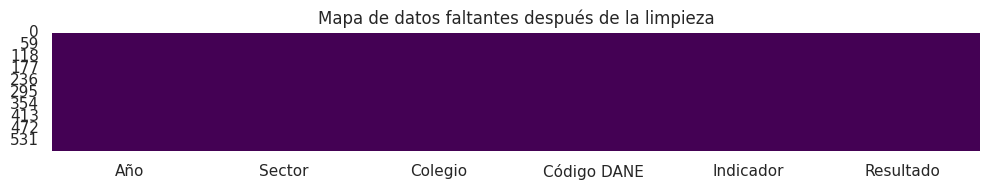

In [ ]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())

df_filtrado = df.dropna()

print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
plt.show()

Basic visualizations
Subtask:
Generate basic visualizations for key variables (histograms, box plots for numerical data; bar plots, pie charts for categorical data).

Reasoning: Generate histograms and box plots for the 'Resultado' column in the df_filtrado DataFrame as requested in steps 1 and 2 of the instructions.

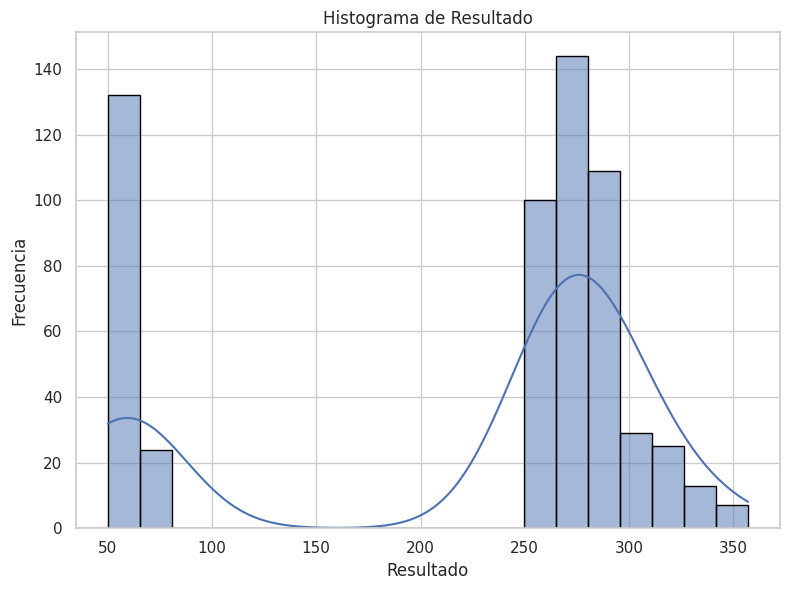

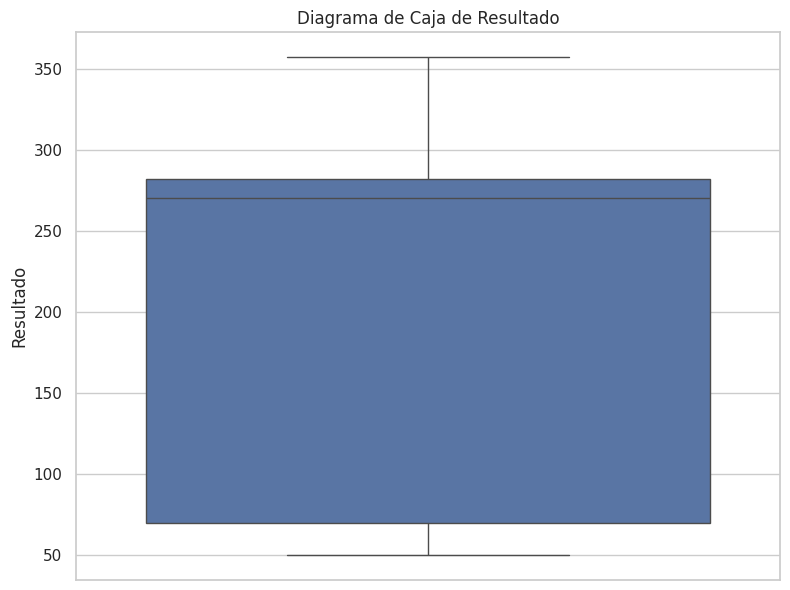

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Resultado'
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Resultado'], bins=20, kde=True, edgecolor='black')
plt.title('Histograma de Resultado')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Box plot for 'Resultado'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtrado['Resultado'])
plt.title('Diagrama de Caja de Resultado')
plt.ylabel('Resultado')
plt.tight_layout()
plt.show()

Reasoning: Generate pie charts for the specified categorical variables as requested in step 3 of the instructions.

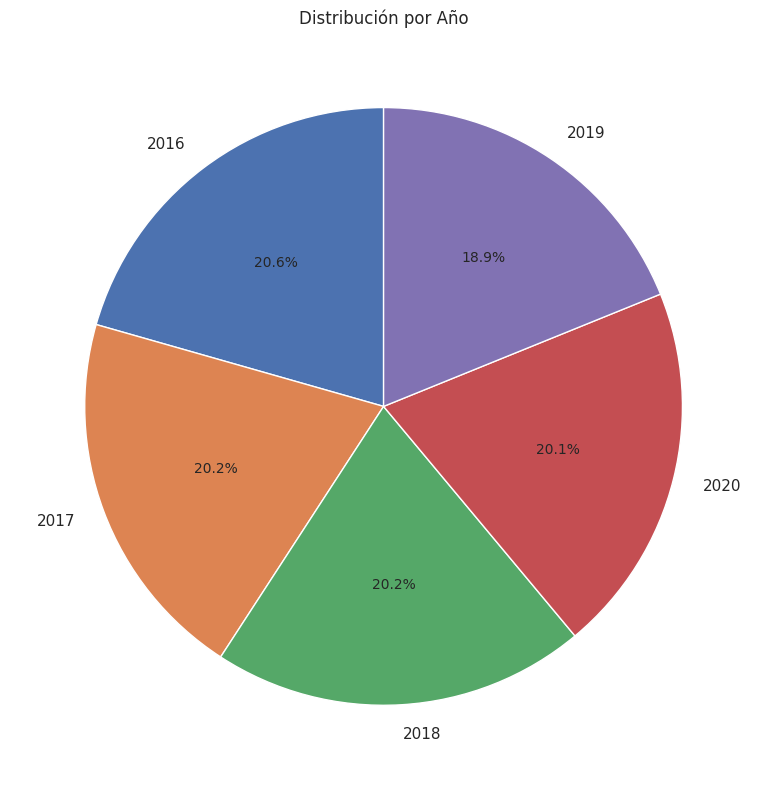

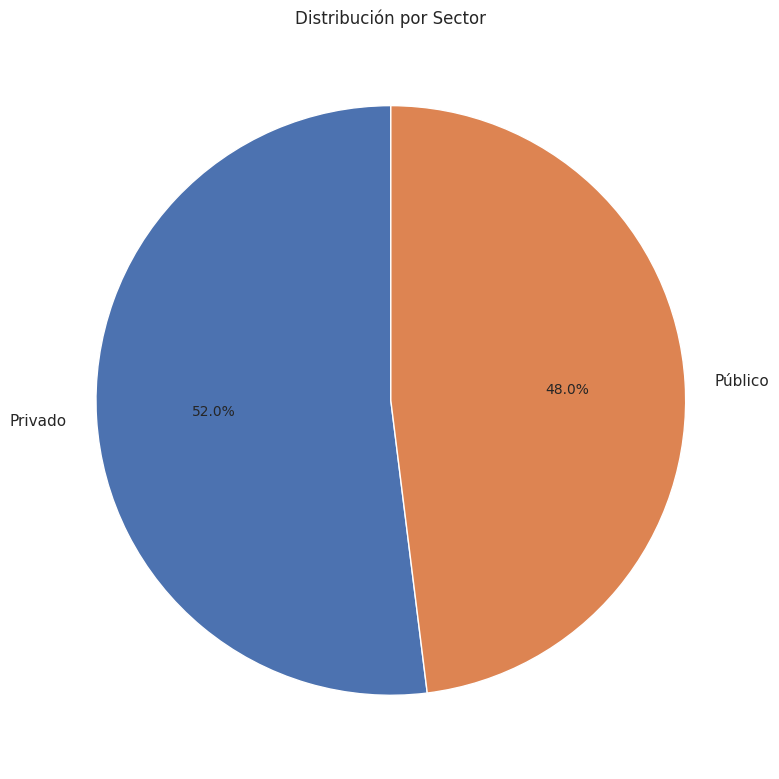

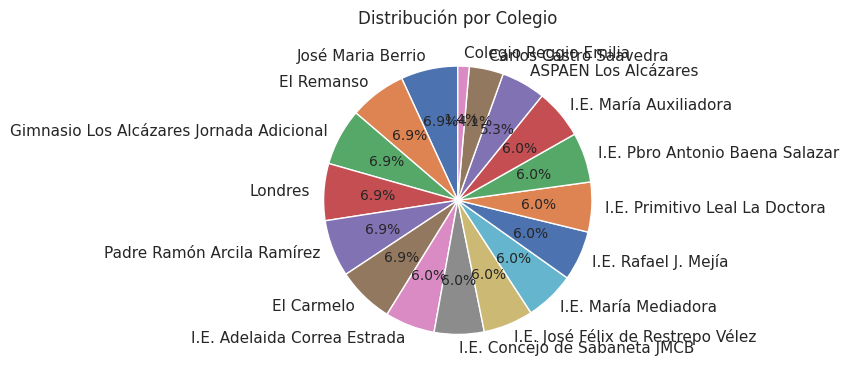

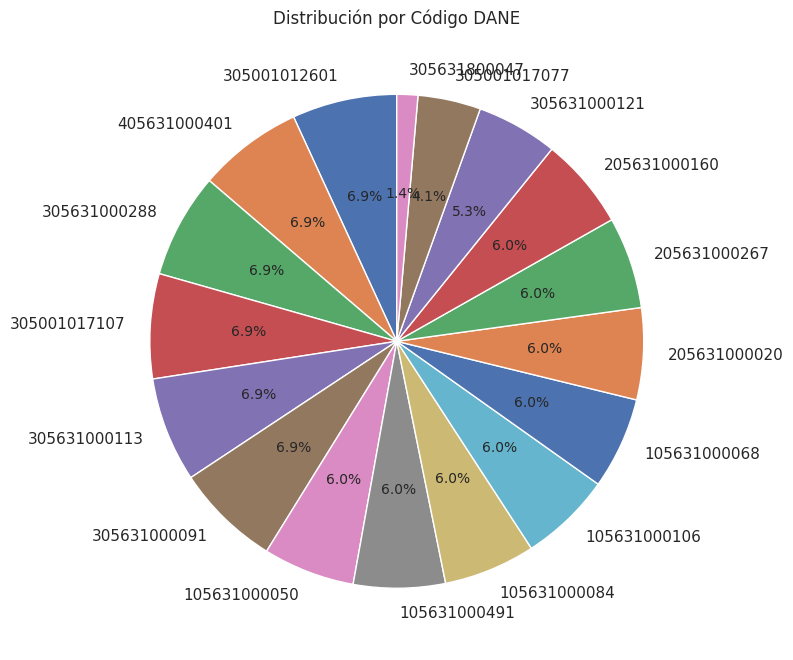

In [ ]:
# Generate pie charts for categorical variables
categorical_vars = ['Año', 'Sector', 'Colegio', 'Código DANE']

for var in categorical_vars:
    plt.figure(figsize=(8, 8))
    df_filtrado[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución por {var}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

Reasoning: Generate bar plots for the specified categorical variables as requested in step 4 of the instructions.

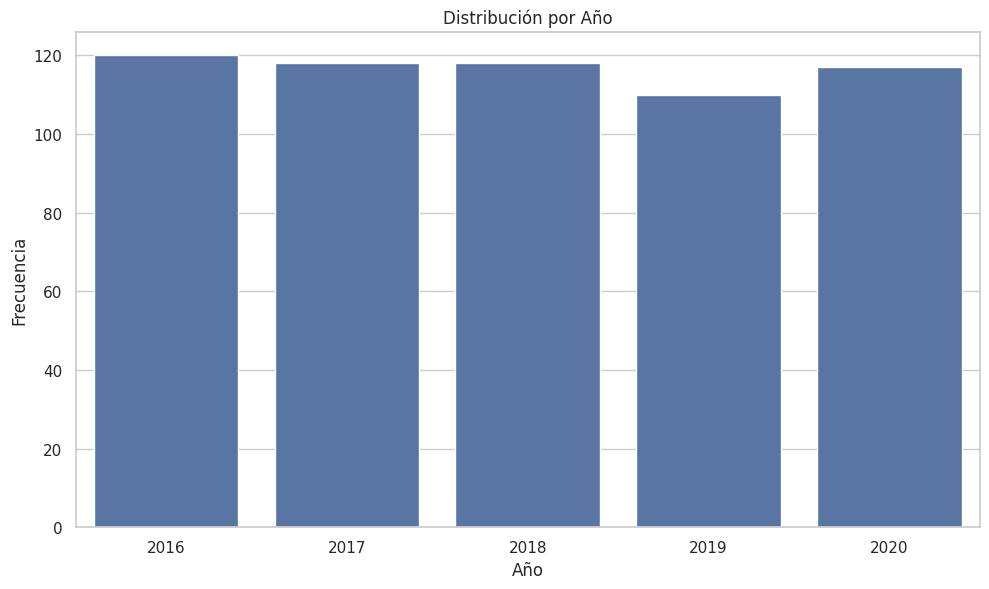

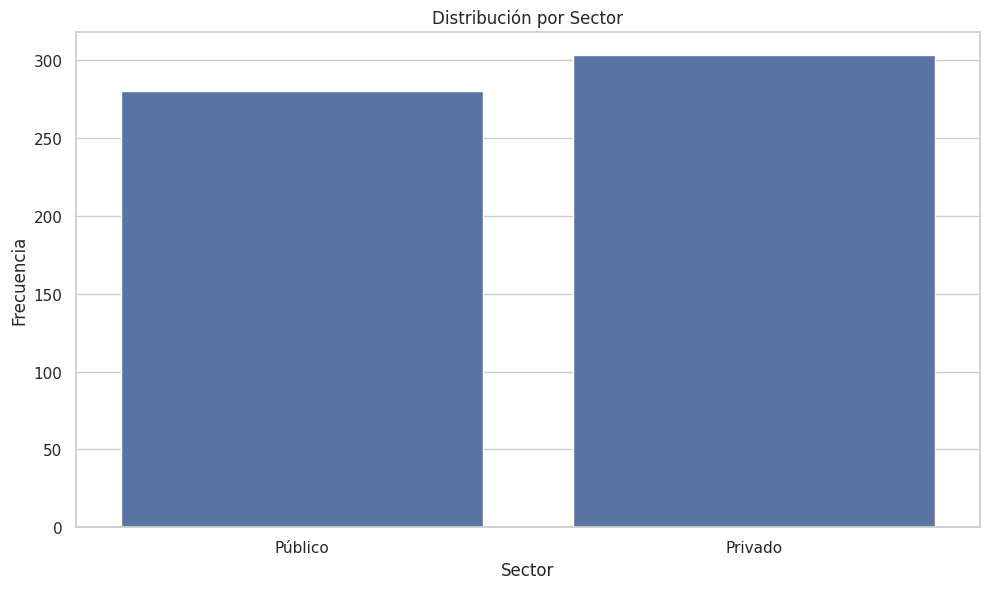

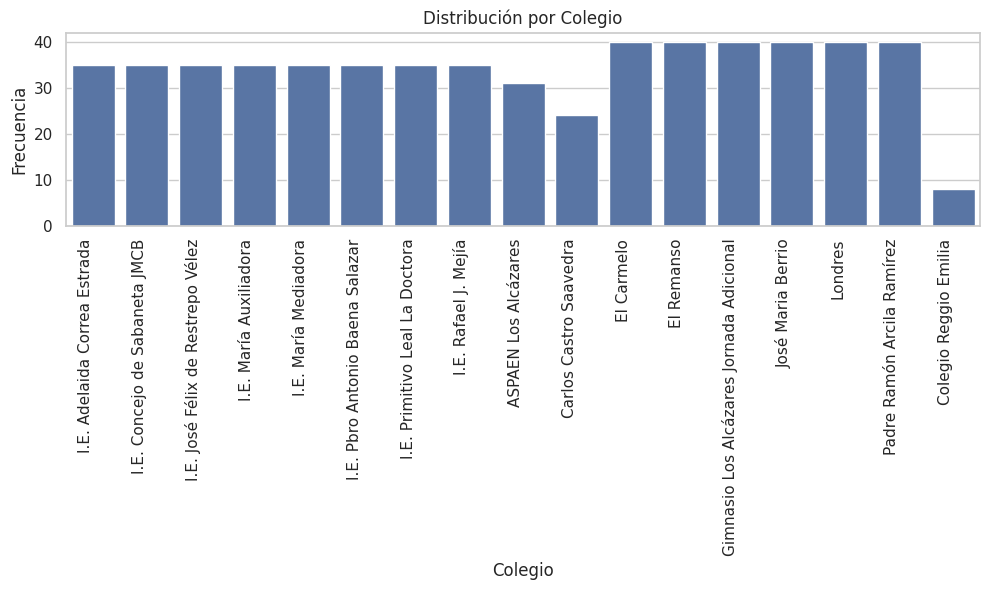

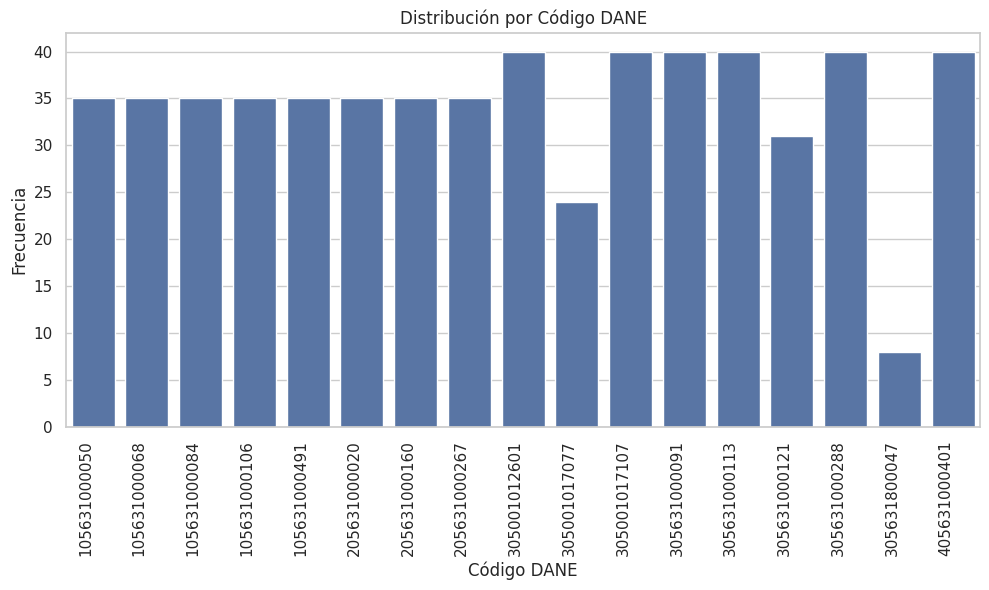

In [ ]:
# Generate bar plots for categorical variables
categorical_vars = ['Año', 'Sector', 'Colegio', 'Código DANE']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtrado, x=var)
    plt.title(f'Distribución por {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    if df_filtrado[var].nunique() > 10: # Rotate x-axis labels for readability if many categories
        plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

Outlier detection and handling
Subtask:
Identify and handle outliers in the 'Resultado' column.

Reasoning: Calculate the quartiles and IQR for 'Resultado', define outlier bounds, filter the DataFrame to exclude outliers, and print the number of rows remaining.

In [ ]:
# Calculate Q1, Q3, and IQR for the 'Resultado' column
Q1 = df_filtrado['Resultado'].quantile(0.25)
Q3 = df_filtrado['Resultado'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers in the 'Resultado' column
df_sinatipicos = df_filtrado[
    (df_filtrado['Resultado'] >= limite_inferior) & (df_filtrado['Resultado'] <= limite_superior)
]

# Print the number of rows remaining after outlier removal
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")

Número de datos restantes después de eliminar outliers: 583


Normality testing
Subtask:
Perform normality tests on the 'Resultado' column.

Reasoning: Perform normality tests (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, Jarque-Bera) on the 'Resultado' column of df_sinatipicos and generate a QQ plot to visually assess normality.

Resultados de los tests de normalidad (valores p):

Variable: Resultado
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 80.5745, Crítico (5%): 0.7820
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)



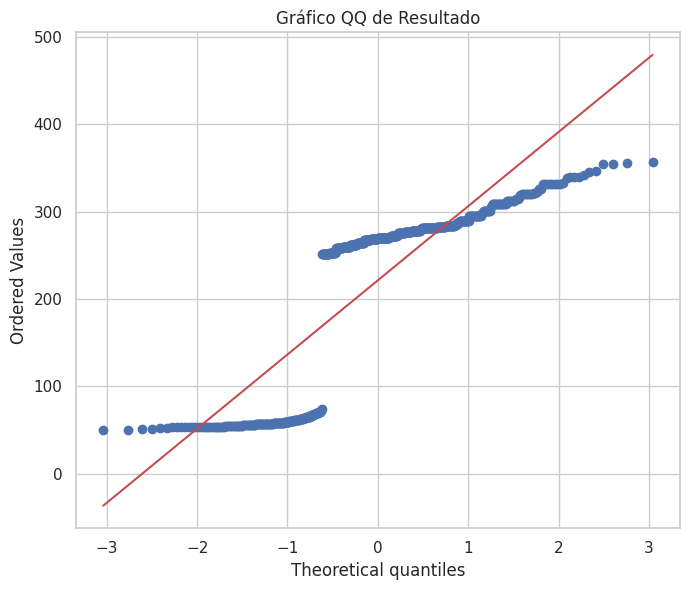

In [ ]:
import numpy as np
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to evaluate
columnas_a_evaluar = ['Resultado']

# Dictionary to store results
resultados_normalidad = {}

# Evaluate each variable
for col in columnas_a_evaluar:
    if col in df_sinatipicos.columns:
        datos = df_sinatipicos[col].dropna()
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(datos)
        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # 5%
        ad_normal = stat_ad < crit_ad
        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)
        # Store results
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 3
        }

# Display results in a table
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# QQ plots for each variable
fig, axes = plt.subplots(1, 1, figsize=(7, 6))
for i, col in enumerate(columnas_a_evaluar):
    if col in df_sinatipicos.columns:
        probplot(df_sinatipicos[col].dropna(), dist="norm", plot=axes)
        axes.set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()

Analyze by indicator
Subtask:
Explore the distribution of 'Resultado' for each 'Indicador' using visualizations (e.g., box plots) and descriptive statistics.

Reasoning: Create a filtered DataFrame containing only the rows where the 'Indicador' column is one of the subject indicators.

In [ ]:
# Create a filtered DataFrame for subject indicators
subject_indicators = [
    'Promedio Matematicas',
    'Promedio Lectura Critica',
    'Promedio Ingles',
    'Promedio Ciencias Naturales',
    'Promedio Sociales y Ciudadanas'
]

df_subjects = df_filtrado[df_filtrado['Indicador'].isin(subject_indicators)].copy()

display(df_subjects.head())

,Año,Sector,Colegio,Código DANE,Indicador,Resultado
5,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Promedio Matematicas,57
6,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Promedio Lectura Critica,57
12,2017,Público,I.E. Adelaida Correa Estrada,105631000050,Promedio Matematicas,60
13,2017,Público,I.E. Adelaida Correa Estrada,105631000050,Promedio Lectura Critica,60
19,2018,Público,I.E. Adelaida Correa Estrada,105631000050,Promedio Matematicas,55


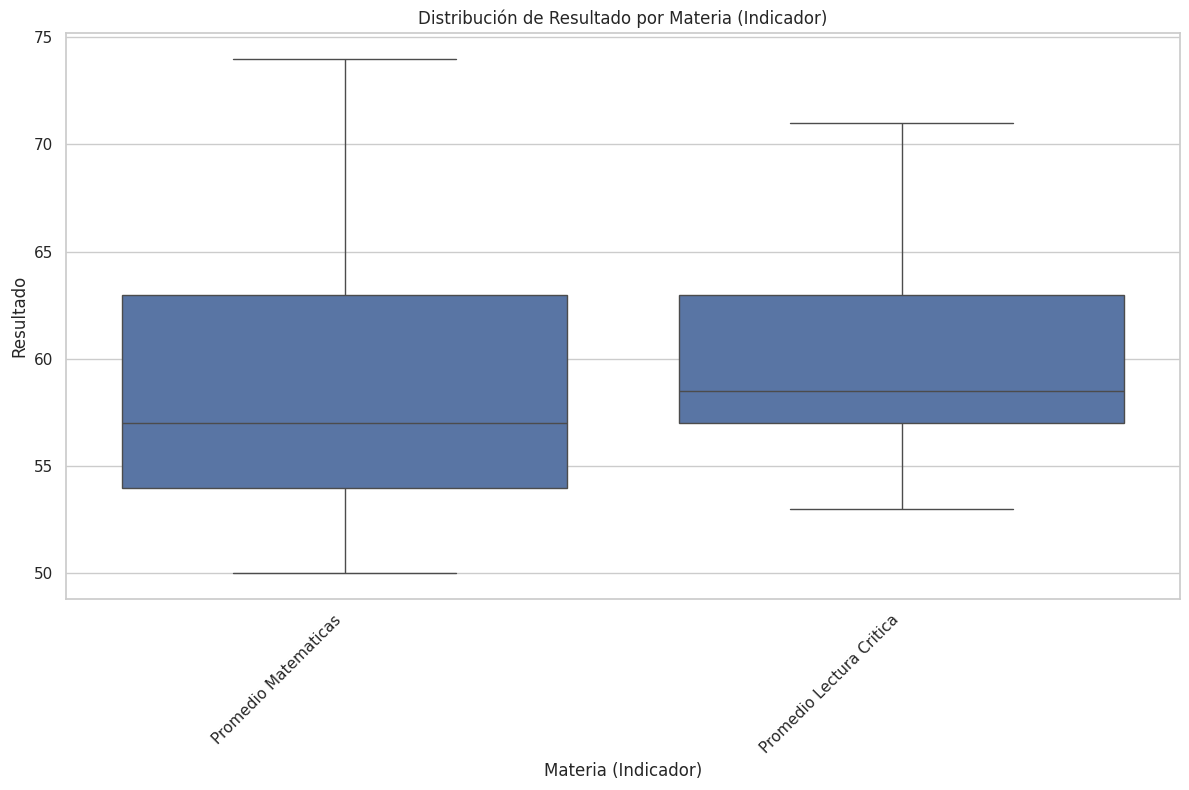

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a box plot for 'Resultado' by 'Indicador'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Indicador', y='Resultado', data=df_subjects)
plt.title('Distribución de Resultado por Materia (Indicador)')
plt.xlabel('Materia (Indicador)')
plt.ylabel('Resultado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate descriptive statistics for 'Resultado' grouped by 'Indicador'
descriptive_stats = df_subjects.groupby('Indicador')['Resultado'].describe()

display(descriptive_stats)

,count,mean,std,min,25%,50%,75%,max
Indicador,,,,,,,,
Promedio Lectura Critica,78.0,59.858974,4.192524,53.0,57.0,58.5,63.0,71.0
Promedio Matematicas,78.0,59.076923,6.421897,50.0,54.0,57.0,63.0,74.0


Analyze by sector and colegio
Subtask:
Investigate the relationship between 'Resultado' and 'Sector' and 'Colegio' using visualizations and descriptive statistics.

Reasoning: Create a box plot to visualize the distribution of 'Resultado' for each 'Sector' using the df_filtrado DataFrame and add appropriate labels and a title to the plot.

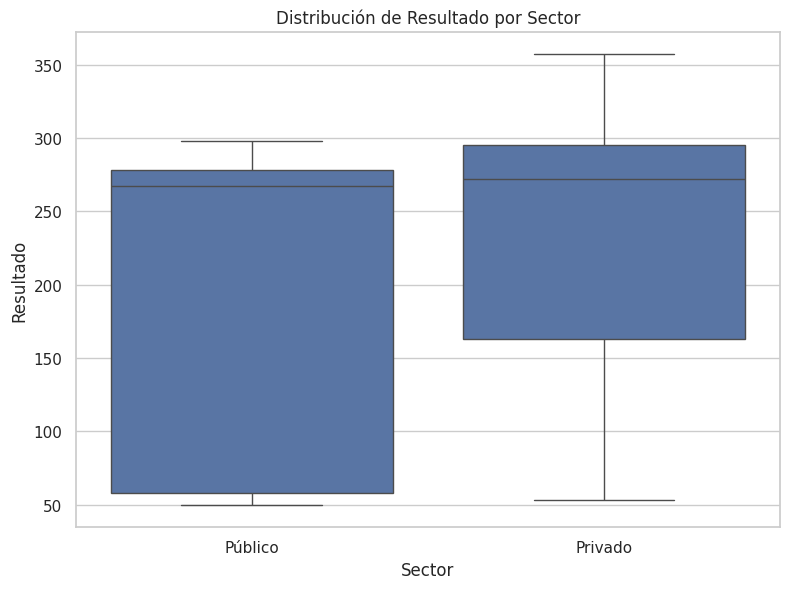

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sector', y='Resultado', data=df_filtrado)
plt.xlabel('Sector')
plt.ylabel('Resultado')
plt.title('Distribución de Resultado por Sector')
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ResultadosSabanetaSaber11.csv to ResultadosSabanetaSaber11.csv
